In [1]:
# For division
from __future__ import division
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt

%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader as web

# For time stamps
from datetime import datetime

In [15]:
# The tech stocks we'll use for this analysis
ticker = ['TSLA']

# To Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 40,end.month,end.day)


# Creating loop for grabing yahoo finance data and setting as a dataframe

for stock in ticker:   
    
    #To set DataFrame as the Stock Ticker
    
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)['Adj Close']

In [17]:
TSLA.head()

Date
2010-06-29    23.889999
2010-06-30    23.830000
2010-07-01    21.959999
2010-07-02    19.200001
2010-07-06    16.110001
Name: Adj Close, dtype: float64

In [18]:
TSLA.tail()

Date
2020-07-09    1394.280029
2020-07-10    1544.650024
2020-07-13    1497.060059
2020-07-14    1516.800049
2020-07-15    1484.689941
Name: Adj Close, dtype: float64

In [19]:
TSLA.shape

(2529,)

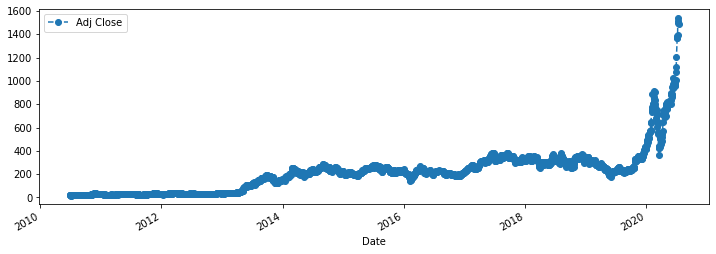

In [20]:
TSLA.plot(figsize=(12,4),legend=True, linestyle='--', marker='o')

In [21]:
TSLA.describe()

count    2529.000000
mean      214.329000
std       181.264697
min        15.800000
25%        35.150002
50%       218.339996
75%       285.359985
max      1544.650024
Name: Adj Close, dtype: float64

In [22]:
df = TSLA
df.head()

Date
2010-06-29    23.889999
2010-06-30    23.830000
2010-07-01    21.959999
2010-07-02    19.200001
2010-07-06    16.110001
Name: Adj Close, dtype: float64

In [23]:
df.describe()

count    2529.000000
mean      214.329000
std       181.264697
min        15.800000
25%        35.150002
50%       218.339996
75%       285.359985
max      1544.650024
Name: Adj Close, dtype: float64

In [24]:
df = df.reset_index()

In [25]:
df.head()

,Date,Adj Close
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001


In [26]:
df[['ds','y']] = df[['Date' ,'Adj Close']]

In [27]:

df = df[['ds','y']]
df.head()

,ds,y
0,2010-06-29,23.889999
1,2010-06-30,23.830000
2,2010-07-01,21.959999
3,2010-07-02,19.200001
4,2010-07-06,16.110001


In [29]:
# Importing the prophet library:

import fbprophet

In [30]:
# After importing the prophet library we need to create an instance of a Prophet object
#Instantiating: Instantiation − The creation of an instance of a class. Method − A special kind of function that is defined in a class definition. Object − A unique instance of a data structure that's defined by its class. An object comprises both data members (class variables and instance variables) and methods.
#https://www.tutorialspoint.com/python/python_classes_objects.htm

m = fbprophet.Prophet()

In [31]:
# Now we have to use the fit method on the prophet object and pass in our dataframe because we need to fit our model to our historical data.

m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
# Now it is time to create future dates, using Prophet and its builtin helper function "make_future_dataframe"

future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2889,2021-07-11
2890,2021-07-12
2891,2021-07-13
2892,2021-07-14
2893,2021-07-15


In [40]:
# Now it is time to predict future stock prices using the predict method

forecast = m.predict(future)

forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2889,2021-07-11,885.195556,807.848482,1065.974400,825.400823,942.365036,51.574787,51.574787,51.574787,1.556755,1.556755,1.556755,50.018032,50.018032,50.018032,0.0,0.0,0.0,936.770343
2890,2021-07-12,885.817385,808.508183,1063.151899,825.766004,943.283302,47.412345,47.412345,47.412345,-0.155021,-0.155021,-0.155021,47.567366,47.567366,47.567366,0.0,0.0,0.0,933.229731
2891,2021-07-13,886.439214,804.769548,1057.540125,826.131185,944.201568,45.118597,45.118597,45.118597,0.279419,0.279419,0.279419,44.839179,44.839179,44.839179,0.0,0.0,0.0,931.557812
2892,2021-07-14,887.061044,791.686167,1052.831998,826.496366,945.100312,42.281576,42.281576,42.281576,0.415741,0.415741,0.415741,41.865836,41.865836,41.865836,0.0,0.0,0.0,929.342620
2893,2021-07-15,887.682873,799.453650,1056.719478,826.861547,945.837697,37.727650,37.727650,37.727650,-0.956589,-0.956589,-0.956589,38.684240,38.684240,38.684240,0.0,0.0,0.0,925.410523


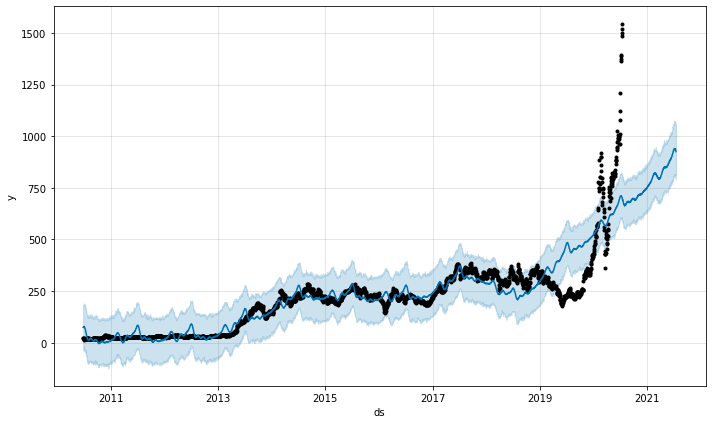

In [41]:
# Visualisation:

m.plot(forecast);

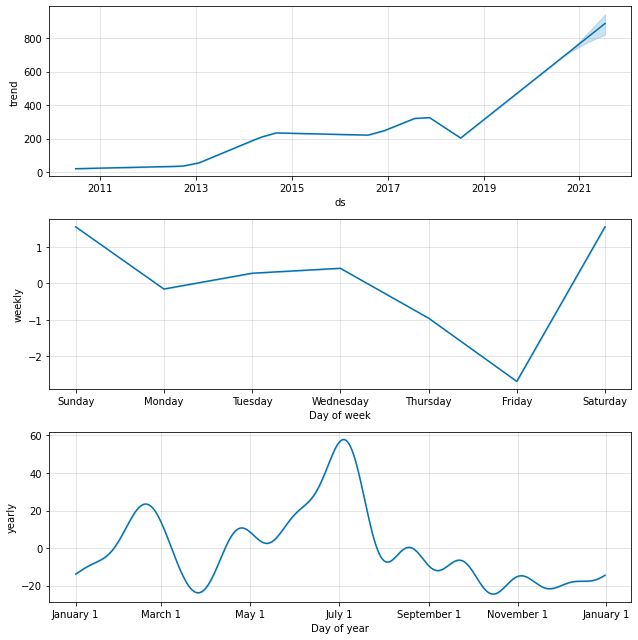

In [35]:
# If you want to visualize the individual forecast components, you can use Prophet’s built-in plot_components method:

m.plot_components(forecast);

In [36]:
df.describe()

,y
count,2529.000000
mean,214.329000
std,181.264697
min,15.800000
25%,35.150002
50%,218.339996
75%,285.359985
max,1544.650024


In [37]:
df.shape

(2529, 2)

In [38]:
forecast.shape

(2894, 19)

In [39]:
forecast.describe()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.000000,2894.0,2894.0,2894.0,2894.000000
mean,285.350318,173.935748,395.667406,282.268277,287.910446,-0.375827,-0.375827,-0.375827,-0.543204,-0.543204,-0.543204,0.167376,0.167376,0.167376,0.0,0.0,0.0,284.974491
std,236.463903,236.491068,239.642569,229.529988,242.448247,20.124638,20.124638,20.124638,1.196628,1.196628,1.196628,20.090840,20.090840,20.090840,0.0,0.0,0.0,238.362737
min,20.690560,-116.260699,100.653248,20.690560,20.690560,-27.198569,-27.198569,-27.198569,-2.697059,-2.697059,-2.697059,-24.510562,-24.510562,-24.510562,0.0,0.0,0.0,-4.630078
25%,91.571616,-12.868406,207.082973,91.571616,91.571616,-16.826371,-16.826371,-16.826371,-0.956589,-0.956589,-0.956589,-16.201537,-16.201537,-16.201537,0.0,0.0,0.0,96.024506
50%,229.773536,120.203207,341.477617,229.773536,229.773536,-6.047613,-6.047613,-6.047613,-0.155021,-0.155021,-0.155021,-5.689669,-5.689669,-5.689669,0.0,0.0,0.0,230.172401
75%,337.830458,239.839503,458.916505,337.830458,337.830458,9.777958,9.777958,9.777958,0.279419,0.279419,0.279419,10.346099,10.346099,10.346099,0.0,0.0,0.0,350.331332
max,887.682873,814.102948,1069.552256,820.738146,943.687197,59.412038,59.412038,59.412038,1.556755,1.556755,1.556755,57.858924,57.858924,57.858924,0.0,0.0,0.0,940.254790
